In [32]:
#load the dataset
from sklearn.datasets import fetch_openml

# Load the Boston Housing Dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [33]:
import pandas as pd
# Convert the data and target into a pandas DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.Series(boston.target, name='MEDV')

# Concatenate the data and target into a single DataFrame
df= pd.concat([data, target], axis=1)


In [34]:
print(df.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [35]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [36]:
print(df.shape)

(506, 14)


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None


In [38]:
print(df.describe())

             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT        MEDV  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063   22.532806  
std      2.105710  168.537116 

Data Preprocessing and EDA

In [39]:
#Check for missing valueus
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [40]:
#Data normalization
from sklearn.preprocessing import StandardScaler

#Select the numerical features
num_feat=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

#Standardize the features
scaler=StandardScaler()
df[num_feat]=scaler.fit_transform(df[num_feat])

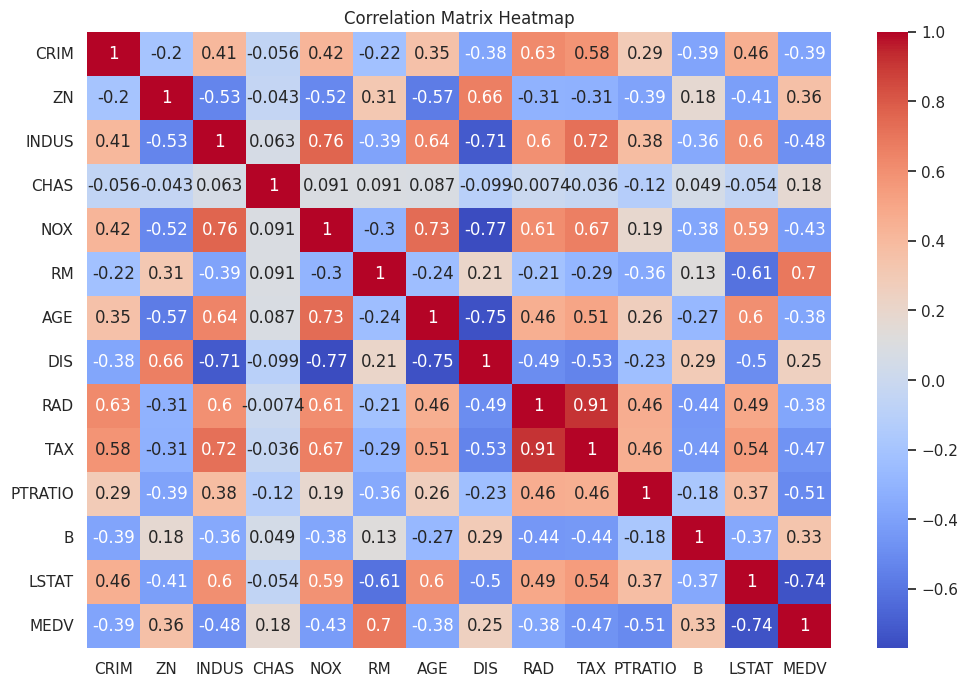

In [41]:
#Correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

correlation_matrix=df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

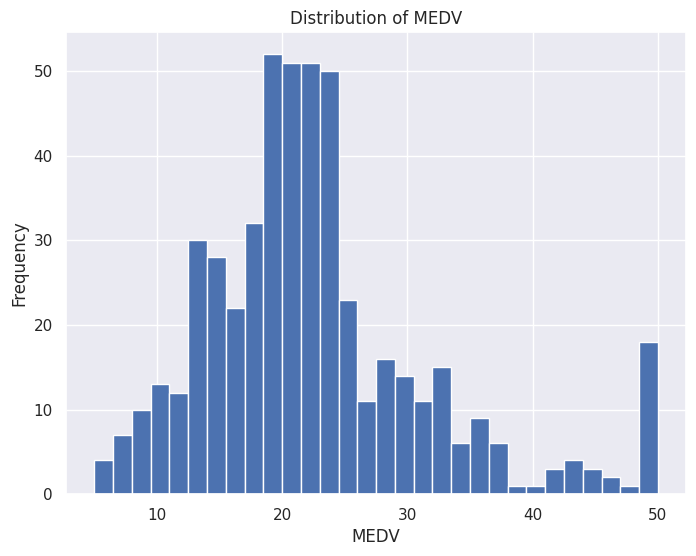

In [42]:
#Histogram of Target variable
plt.figure(figsize=(8, 6))
plt.hist(df['MEDV'], bins=30)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Distribution of MEDV')
plt.show()

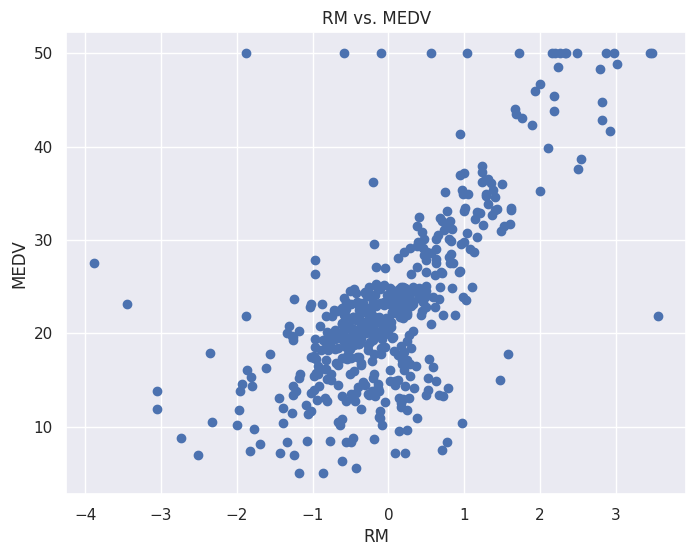

In [43]:

# Scatter plot of RM vs. MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RM vs. MEDV')
plt.show()

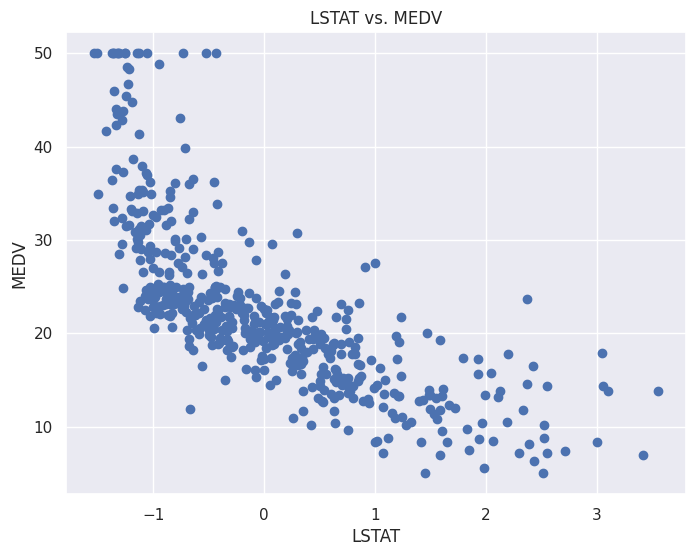

In [44]:
# Scatter plot of LSTAT vs. MEDV
plt.figure(figsize=(8, 6))
plt.scatter(df['LSTAT'], df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT vs. MEDV')
plt.show()

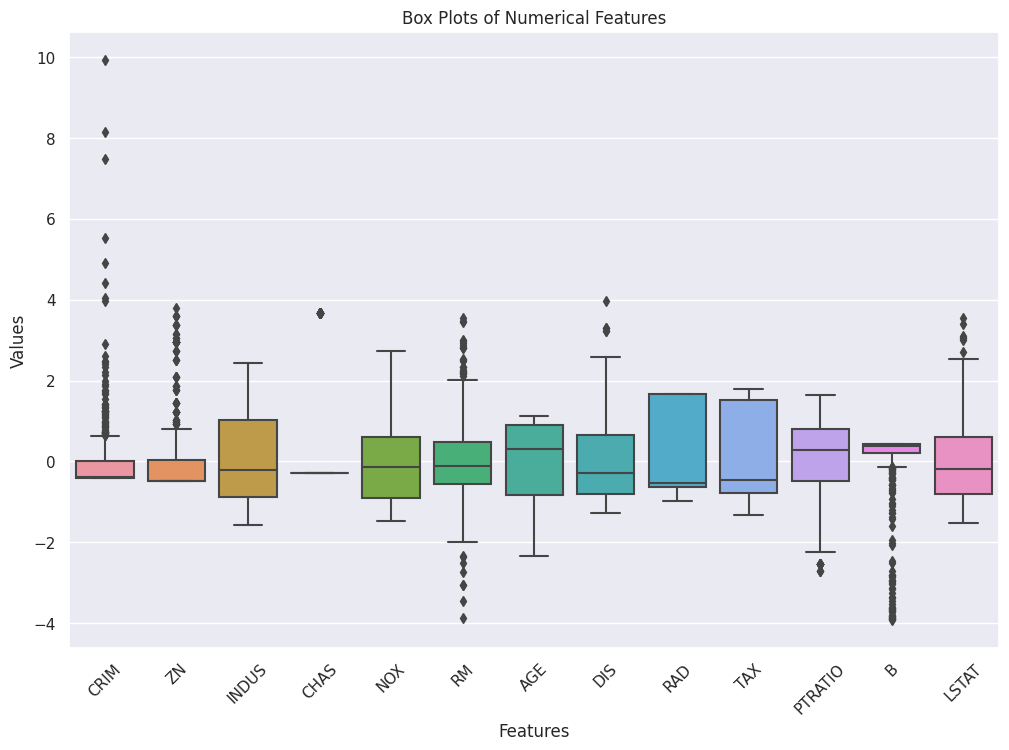

In [45]:
# Create box plots for each feature
numerical_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features], orient='vertical')
plt.title('Box Plots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

Building the xgboost model

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [47]:
x_train, x_test, y_train, y_test=train_test_split(df[num_feat], df['MEDV'], test_size=0.2, random_state=42)

In [48]:
#Create the xgboost model
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)

In [49]:
# Train the model
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
# Make predictions on the testing data
y_pred = xgb_model.predict(x_test)

In [51]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2): ", r2)

Mean Squared Error (MSE):  7.266727280170309
Mean Absolute Error (MAE):  1.9809417397368188
R-squared (R2):  0.9009088721867283
